# Multiple Linear Regression

Before moving forward into the data lets first discuss about Regression.

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distances of data points from the curve or line is minimized. 

There are multiple benefits of using regression analysis. They are as follows:
1. It indicates the significant relationships between dependent variable and independent variable.
2. It indicates the strength of impact of multiple independent variables on a dependent variable.

Types of regression techniques

1. Linear Regression
2. Logistic Regression
3. Polynomial Regression
4. Stepwise Regression
5. Ridge Regression
6. Lasso Regression
7. ElasticNet Regression

Now the last question arises how to select the right Regression Model.

it is important to choose the best suited technique based on type of independent and dependent variables, dimensionality in the data and other essential characteristics of the data.
1. Data exploration is an inevitable part of building predictive model. it helps in identify the relationship and impact of variables
2. To compare the goodness of fit for different modelslike statistical significance of parameters, R-square, Adjusted r-square, AIC, BIC and error term.
3. Cross-validation is the best way to evaluate models used for prediction. Here you divide your data set into two group (train and validate). A simple mean squared difference between the observed and predicted values give you a measure for the prediction accuracy.
4. It’ll also depend on your objective.
5. Regression regularization methods(Lasso, Ridge and ElasticNet) works well in case of high dimensionality and multicollinearity among the variables in the data set.

Multiple linear regression is basically having many features and one output feature. The equation of Multiple Linear Regression is:-

    equation:  y = A+B1x1+B2x2+B3x3+B4x4

we have one dependent feature and multiple independent features then basically call it a multiple linear regression.
All features need to be independent there should be no correlation among them.

## Multiple Linear Regression in Python

In python Multiple Linear regression can be achieve by statsmodels and sklearn method. Steps for Multiple Linear Regression:-
1. Import Libraries
2. Read data
3. Check missing, Find null and fill null, drop columns not to be used for model.  
4. Check data info, describe. if any categorical data convert into dummies.
5. Plot Correlation among variables, check correlation by pairplot, compare each features with other.
6. Preparing model and model summary
7. Checking coefficients, t-values, p-values, R-squared and Adjusted R-squared, AIC value, VIF for multicollinearity.
8. If any column is linear find the best column and leave the other. Do linear regression on both to find the best.
9. Residual analysis by QQ plot check residual
10. Standardized model and plot model to find residual points.
11. Model Validation Technique- Find outliers by cooks distance plot and influence plot.
12. Repeat the above steps by removing the outlier again and again until cooks distance is less than 1.

In [19]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot 

In [30]:
# Read data
toyota_data= pd.read_csv('ToyotaCorolla.csv')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [31]:
toyota_data1= toyota_data.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota_data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [32]:
toyota_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [33]:
toyota_data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
#Checking null values
toyota_data1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

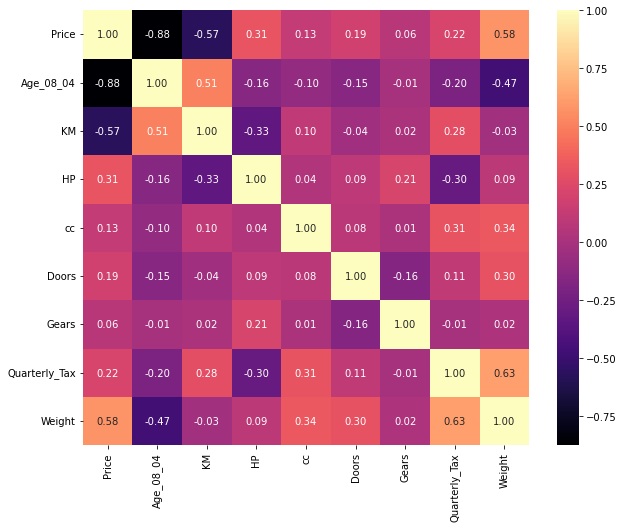

In [7]:
#Correlation Matrix relationship between various variables 
corre= toyota_data1.corr()
figure=plt.figure(figsize=(10,8))
sns.heatmap(corre, cmap='magma',annot=True,fmt='.2f')
plt.show()

In [8]:
#Correlation Matrix
corre= toyota_data1.corr()
corre

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Figure size 1296x720 with 0 Axes>

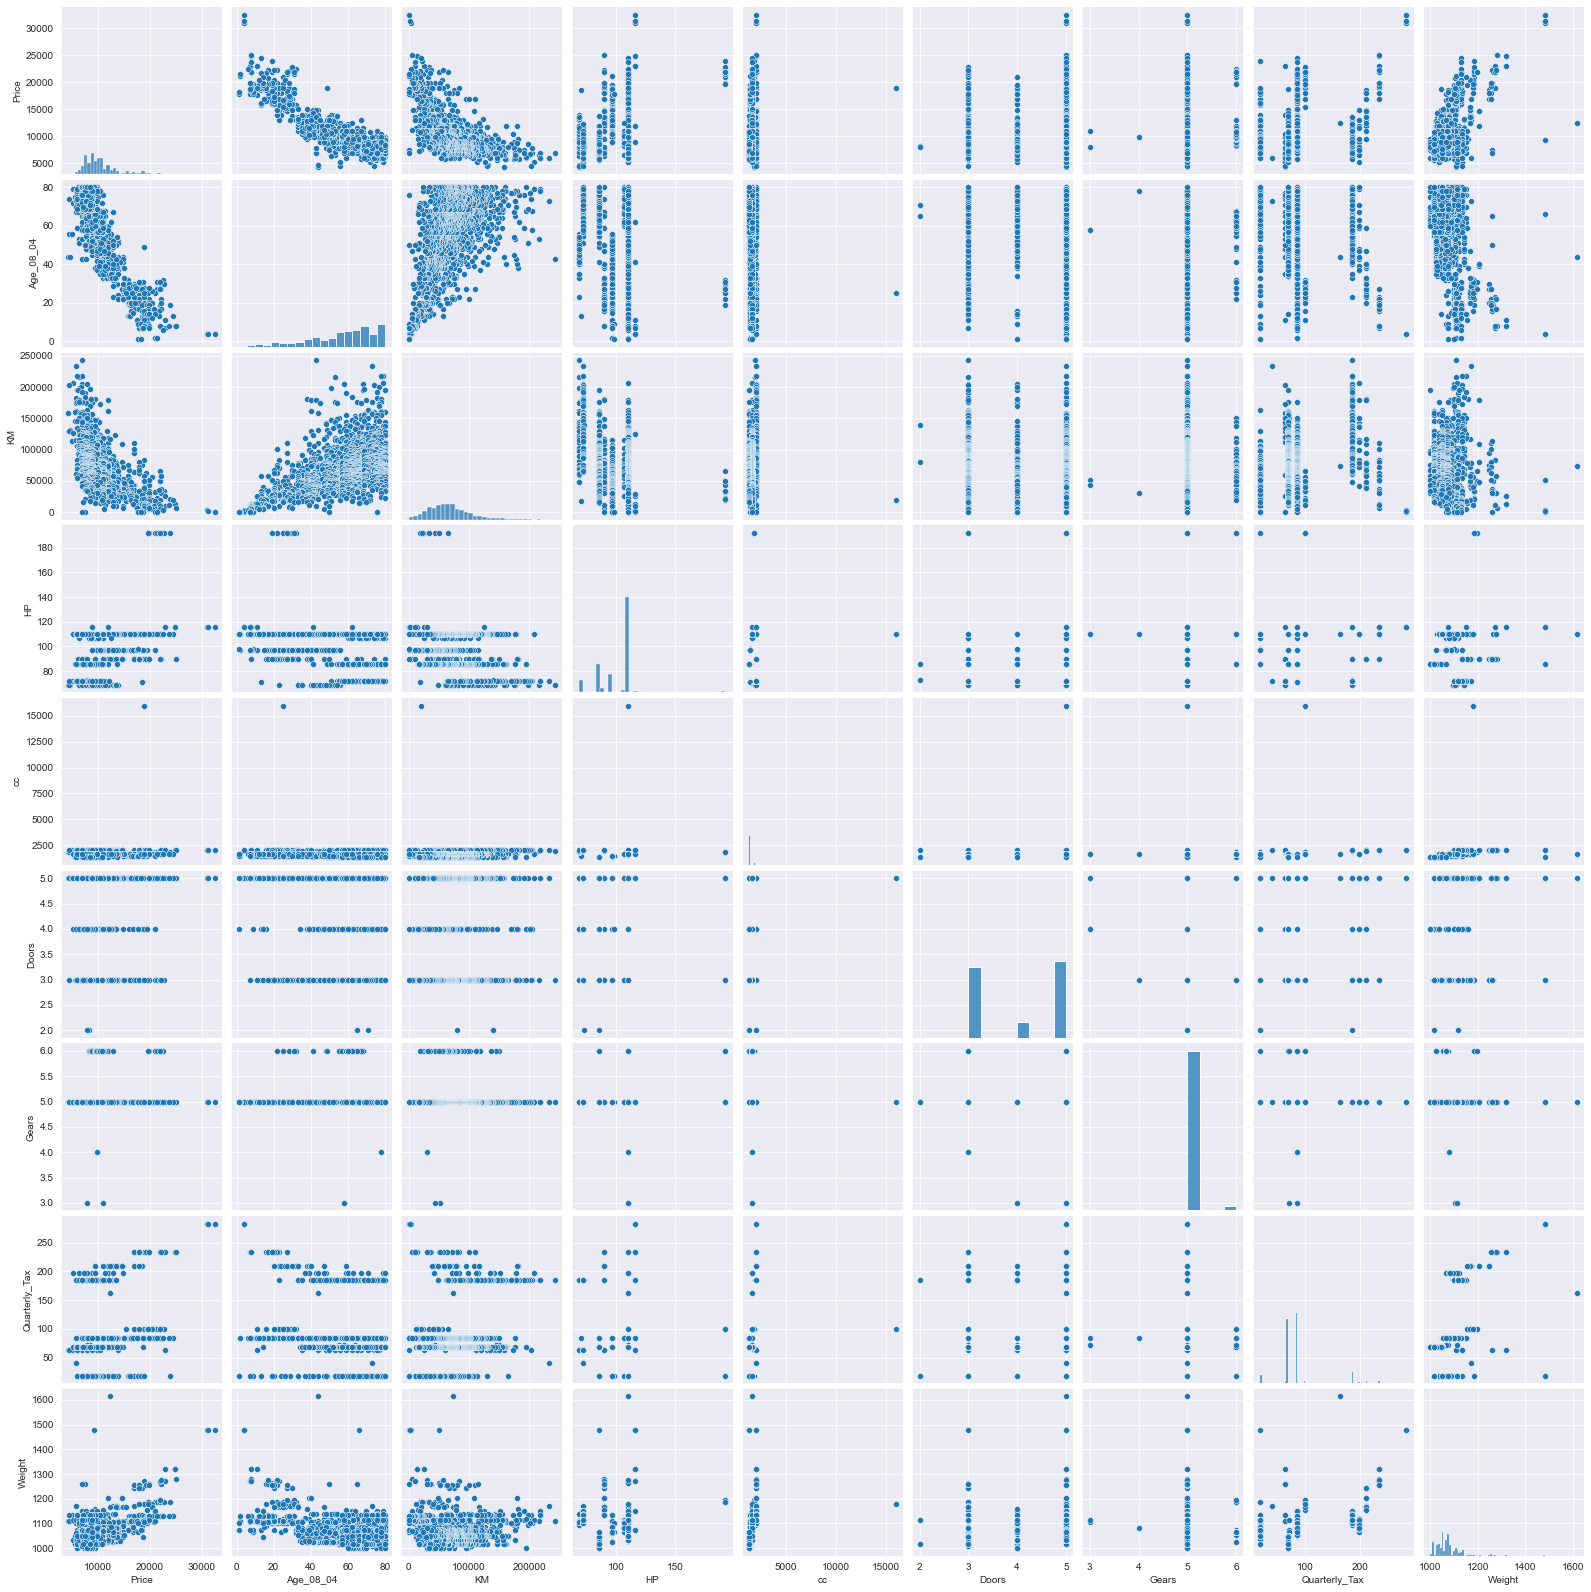

In [34]:
#Pairplot
figure=plt.figure(figsize=(18,10))
sns.set_style(style='darkgrid')
sns.pairplot(toyota_data1)
plt.show()

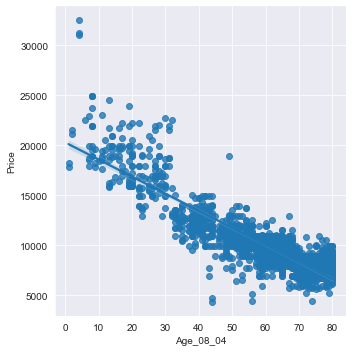

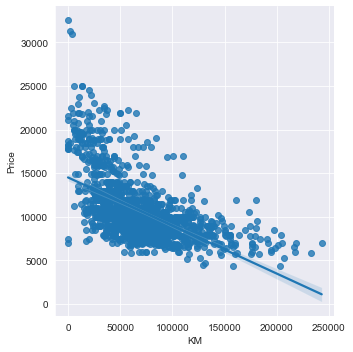

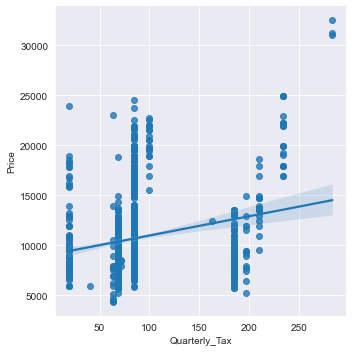

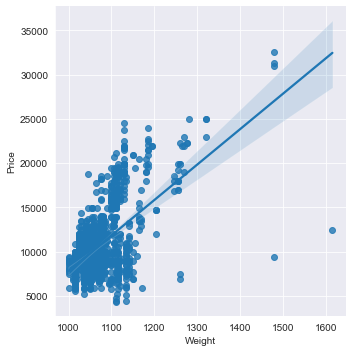

In [10]:
sns.lmplot(x='Age_08_04',y='Price',data=toyota_data1)
sns.lmplot(x='KM',y='Price',data=toyota_data1)
sns.lmplot(x='Quarterly_Tax',y='Price',data=toyota_data1)
sns.lmplot(x='Weight',y='Price',data=toyota_data1)

<AxesSubplot:title={'center':'Price'}, xlabel='cc'>

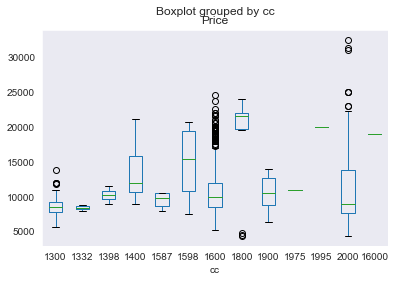

In [11]:
toyota_data1.boxplot(by='cc',column=['Price'],grid=False)

<AxesSubplot:xlabel='HP', ylabel='Count'>

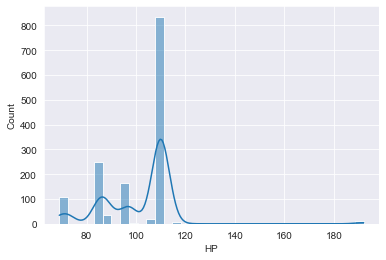

In [12]:
sns.histplot(data=toyota_data1.HP,kde=True)

<AxesSubplot:title={'center':'Price'}, xlabel='Doors'>

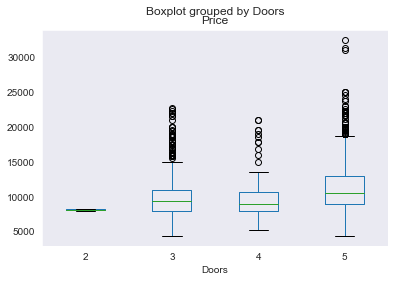

In [13]:
toyota_data1.boxplot(by='Doors',column=['Price'],grid=False)

<AxesSubplot:xlabel='Gears', ylabel='Price'>

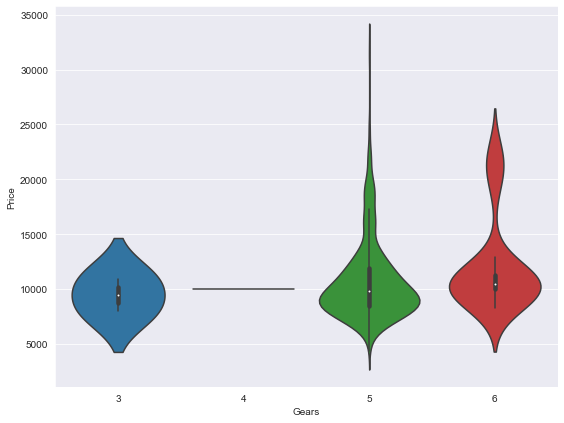

In [14]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = toyota_data1["Gears"], y = toyota_data1["Price"] )

<AxesSubplot:xlabel='Price', ylabel='Count'>

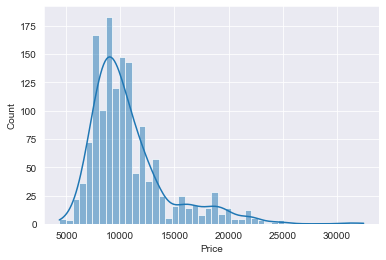

In [15]:
sns.histplot(data=toyota_data1.Price,kde=True)

In [82]:
toyota_data1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [83]:
#Prepairing Model
model1= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:14:38   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#Coefficients how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.
model1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [85]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [86]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [87]:
#A variance inflation factor(VIF) detects multicollinearity in regression analysis. A rule of thumb for interpreting the variance inflation factor:
#1 = not correlated.
#Between 1 and 5 = moderately correlated.
#Greater than 5 = highly correlated.
# how large a VIF has to be before it causes issues is a subject of debate. a VIF above 10 indicates high correlation and is cause for concern.Sometimes a high VIF is no cause for concern at all

r_sq2=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data1).fit().rsquared
vif2=1/(1-r_sq2)

r_sq3=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data1).fit().rsquared
vif3=1/(1-r_sq3)

r_sq4=smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data1).fit().rsquared
vif4=1/(1-r_sq4)

r_sq5=smf.ols('cc~KM+Age_08_04+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data1).fit().rsquared
vif5=1/(1-r_sq5)

r_sq6=smf.ols('Doors~KM+Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_data1).fit().rsquared
vif6=1/(1-r_sq6)

r_sq7=smf.ols('Gears~KM+Age_08_04+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota_data1).fit().rsquared
vif7=1/(1-r_sq7)

r_sq8=smf.ols('Quarterly_Tax~KM+Age_08_04+HP+cc+Doors+Gears+Weight',data=toyota_data1).fit().rsquared
vif8=1/(1-r_sq8)

r_sq9=smf.ols('Weight~Quarterly_Tax+KM+Age_08_04+HP+cc+Doors+Gears',data=toyota_data1).fit().rsquared
vif9=1/(1-r_sq9)

Vif_frame=pd.DataFrame({'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif2,vif3,vif4,vif5,vif6,vif7,vif8,vif9]})
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


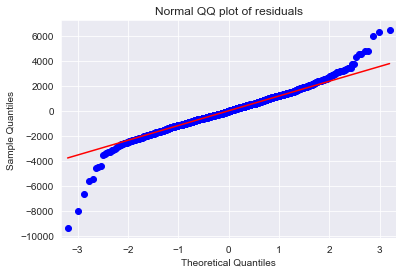

In [88]:
#Test for normality of residual(qqplot)
qqplot= sm.qqplot(model1.resid,line='q')
plt.title('Normal QQ plot of residuals')
plt.show()

In [89]:
#To find the row no. of outliers
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [90]:
#standardized
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

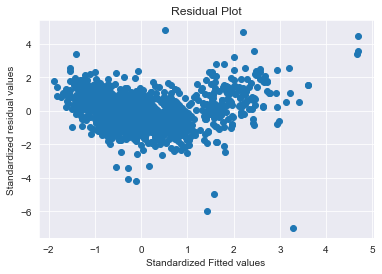

In [91]:
#plot fitted values & Residual
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [92]:
#cooks distance to find outliers
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

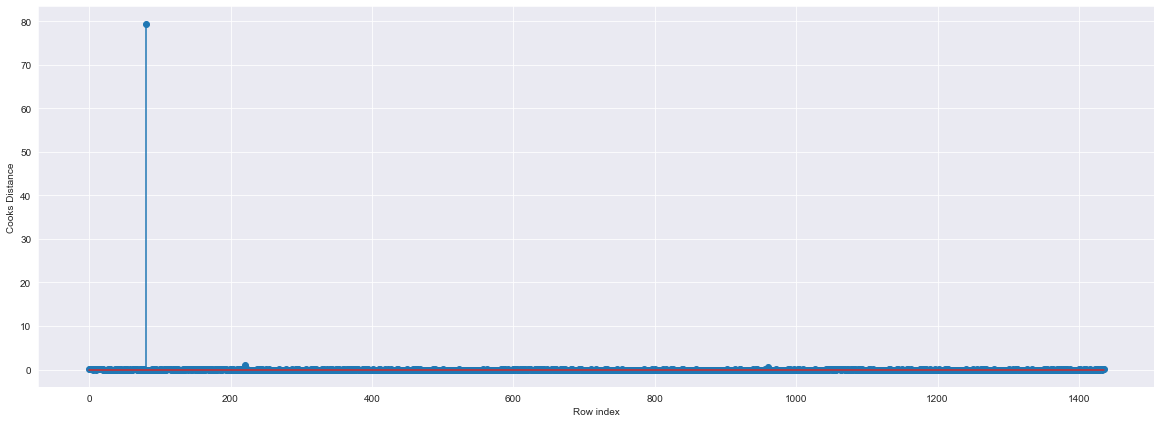

In [94]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [95]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138181)

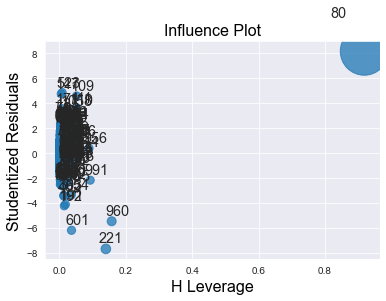

In [96]:
#influence plot
influence_plot(model1)
plt.show()

In [97]:
#Leverage value
k = toyota_data1.shape[1]
n = toyota_data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

### Improving the model

In [103]:
toyota_data2=pd.read_csv('ToyotaCorolla.csv')

In [104]:
toyota_data2= toyota_data2.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota_data2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [105]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota_data2=toyota_data2.drop(toyota_data2.index[[80]],axis=0).reset_index()
toyota_data2 

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [106]:
model2= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:23:10   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.8693790488655818, 0.8686462525057814)

In [108]:
model_influence2 = model2.get_influence()
(c, _) = model_influence2.cooks_distance

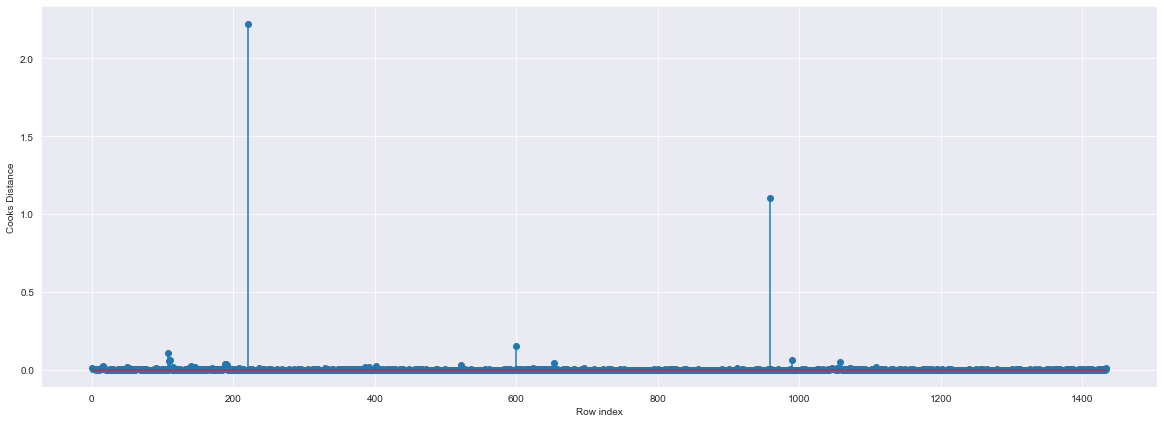

In [109]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [111]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(220, 2.2244611713000864)

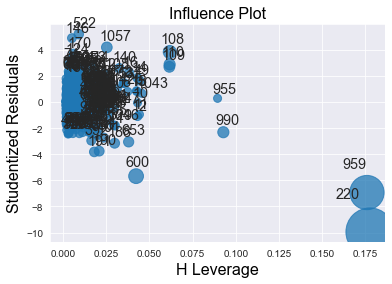

In [112]:
influence_plot(model2)
plt.show()

### Improving the model

In [129]:
toyota_data3=toyota_data2.copy()
toyota_data3= toyota_data3.drop(['index'],axis=1)
toyota_data3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [130]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota_data3=toyota_data3.drop(toyota_data3.index[[959,220]],axis=0).reset_index()
toyota_data3 

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1430,7500,69,20544,86,1300,3,5,69,1025
1429,1431,10845,72,19000,86,1300,3,5,69,1015
1430,1432,8500,71,17016,86,1300,3,5,69,1015
1431,1433,7250,70,16916,86,1300,3,5,69,1015


In [131]:
toyota_data3= toyota_data3.drop(['index'],axis=1)
toyota_data3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [132]:
model3= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:51:54   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.8851845904421739, 0.8845395600513997)

In [134]:
model_influence3 = model3.get_influence()
(c, _) = model_influence3.cooks_distance

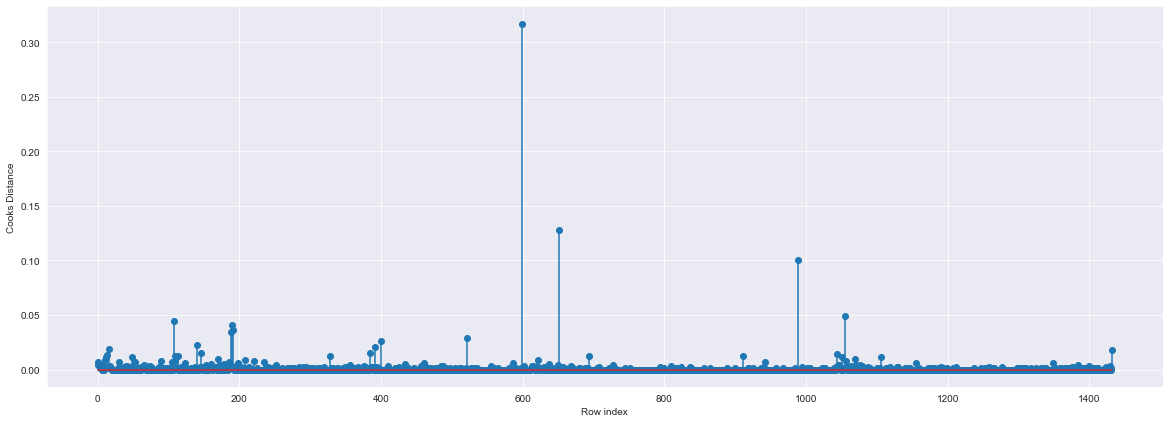

In [135]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

Cooks value is now less than 1 our model is performing better.

## Predicting for new data

In [137]:
pred_y = model3.predict(toyota_data3)

In [141]:
pred_y

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1428     9115.435074
1429     8499.218117
1430     8644.947302
1431     8758.664462
1432    10641.521002
Length: 1433, dtype: float64

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


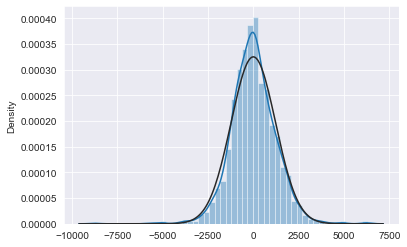

In [143]:
#diagnostic plots to determine whether the resulting regression model is valid.
from scipy import stats
sns.distplot(model3.resid, fit=stats.norm)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

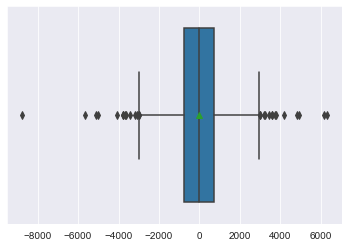

In [144]:
sns.boxplot(model3.resid, showmeans=True)

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


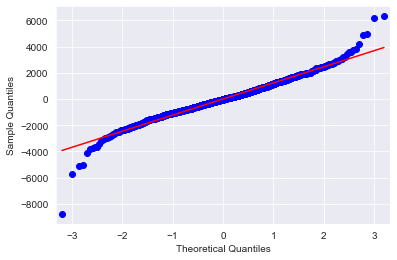

In [145]:
sm.qqplot(model3.resid, line='s');

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


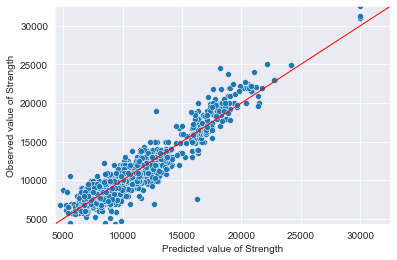

In [146]:
import matplotlib.pyplot as plt
import numpy as np

Y= toyota_data3.Price
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(model3.fittedvalues, Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

# Multiple Linear Regression by sklearn 

In [178]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
#Read data
toyota_data_sklearn= pd.read_csv('ToyotaCorolla.csv')

In [158]:
#drop columns
toyota_data_sklearn= toyota_data_sklearn.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota_data_sklearn

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [159]:
#Preparing the Data
X= toyota_data_sklearn[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Y= toyota_data_sklearn['Price']

In [160]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [162]:
#Training the Algorithm model making
lr= LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [163]:
#For retrieving the slope
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Age_08_04,-117.929573
KM,-0.019158
HP,26.623750
cc,-1.929137
Doors,-70.716525
Gears,588.590084
Quarterly_Tax,3.466385
Weight,24.638746


In [182]:
#To retrieve the intercept:
print(lr.intercept_)

-10419.650979806083


In [164]:
#Making Predictions
y_pred_sk = lr.predict(X_test)

In [165]:
#To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_sk})
df

,Actual,Predicted
651,7950,8217.901236
411,10950,10406.477367
342,14950,12920.772302
1298,7500,7700.706189
483,9900,10456.756015
...,...,...
1051,6150,5440.754203
1374,8600,8355.813583
549,12500,11323.230543
864,8950,9547.670337


In [168]:
#evaluate the performance of algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_sk))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_sk))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_sk)))

Mean Absolute Error: 1053.1383762508967
Mean Squared Error: 3895254.244012713
Root Mean Squared Error: 1973.6398465811114


In [169]:
Y.mean()

10730.824512534818

The value of root mean squared error is 1973.64, which is less than the mean value of the Price of old car. This means that our algorithm is accurate.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 

In [170]:
# Predicting R2 Score the Train set results
r2_score = r2_score(Y_test, y_pred_sk)
r2_score

0.6550065853643883

In [183]:
# Predicting Cross Validation Score
cv_linear = cross_val_score(lr,X= X_train ,y= Y_train,cv=5)
print('Accuracy:',cv_linear.mean()*100)

Accuracy: 86.02299792249009
